In [27]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
from dedalus.extras.plot_tools import plot_bot_2d
figkw = {'figsize':(6,4), 'dpi':100}

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
# Bases
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=np.complex128)
xbasis = d3.Chebyshev(xcoord, 1024, bounds=(0, 300), dealias=2)

# Fields
u = dist.Field(name='u', bases=xbasis)
tau1 = dist.Field(name='tau1')
tau2 = dist.Field(name='tau2')

# Problem
problem = d3.IVP([u, tau1, tau2], namespace=locals())

In [16]:
# Substitutions
dx = lambda A: d3.Differentiate(A, xcoord)
magsq_u = u * np.conj(u)
b = 10
c = 50

# Tau polynomials
tau_basis = xbasis.derivative_basis(2)
p1 = dist.Field(bases=tau_basis)
p2 = dist.Field(bases=tau_basis)
p1['c'][-1] = 1
p2['c'][-2] = 2

In [17]:
# Add main equation, with linear terms on the LHS and nonlinear terms on the RHS
problem.add_equation("dt(u) - b*dx(dx(u)) + tau1*p1 + tau2*p2 = -c*u*dx(u)")

# Add boundary conditions
problem.add_equation("u(x='left') = 0")
problem.add_equation("u(x='right') = 0")

{'LHS': interp(<Field 5324420304>, x=right),
 'RHS': 0,
 'condition': 'True',
 'tensorsig': (),
 'dtype': numpy.complex128,
 'M': 0,
 'L': interp(<Field 5324420304>, x=right),
 'F': <Field 5324421936>,
 'domain': <dedalus.core.domain.Domain at 0x13d5c35c0>,
 'matrix_dependence': array([ True]),
 'matrix_coupling': array([ True])}

In [18]:
# Fields
u = dist.Field(name='u', bases=xbasis)
tau1 = dist.Field(name='tau1')
tau2 = dist.Field(name='tau2')
f = dist.Field(name='f', bases=xbasis)  # New force field

Lx = 3000
# Forcing
x = dist.local_grids(xbasis)[0]  # Extract the single array from the tuple

f['g'] = 1e-3 * np.sin(2*np.pi*x/Lx)  # Sinusoidal force

# Problem
problem = d3.IVP([u, tau1, tau2], namespace=locals())

# Add main equation, with linear terms on the LHS and nonlinear terms on the RHS
problem.add_equation("dt(u) - b*dx(dx(u)) + tau1*p1 + tau2*p2 =-f -c*u*dx(u)") # Add force term to equation

# Add boundary conditions
problem.add_equation("u(x='left') = 0")
problem.add_equation("u(x='right') = 0")

{'LHS': interp(<Field 5325266128>, x=right),
 'RHS': 0,
 'condition': 'True',
 'tensorsig': (),
 'dtype': numpy.complex128,
 'M': 0,
 'L': interp(<Field 5325266128>, x=right),
 'F': <Field 5324421024>,
 'domain': <dedalus.core.domain.Domain at 0x13d5c35c0>,
 'matrix_dependence': array([ True]),
 'matrix_coupling': array([ True])}

In [30]:
# Build solver
solver = problem.build_solver(d3.RK222)

/Users/henrybae/miniconda3/envs/dedalus3/lib/python3.12/site-packages/dedalus/core/problems.py:116: SyntaxWarning: invalid escape sequence '\ '
  """
/Users/henrybae/miniconda3/envs/dedalus3/lib/python3.12/site-packages/dedalus/core/problems.py:189: SyntaxWarning: invalid escape sequence '\ '
  """


ValueError: at least one array or dtype is required

In [233]:
# Stopping criteria
solver.stop_sim_time = 1500

In [234]:
# Setup a sine wave
# x = dist.local_grid(xbasis)
# u['g'] = 1e-3 * np.sin(9 * np.pi * x / 300)

In [26]:
#!!!!

# Fields
u = dist.Field(name='u', bases=xbasis)
tau1 = dist.Field(name='tau1')
tau2 = dist.Field(name='tau2')
f = dist.Field(name='f', bases=xbasis)  # New force field

Lx = 300
# Forcing
x = dist.local_grids(xbasis)[0]  # Extract the single array from the tuple

# Number of sinusoidal functions
N = 20

# Wavenumbers
l_values = np.array([3, 4, 5, 6])

# Initialize f
f['g'] = 0

# Add sinusoidal functions
for _ in range(N):
    # Draw parameters
    A = np.random.uniform(-0.5, 0.5)
    ω = np.random.uniform(-0.4, 0.4)
    φ = np.random.uniform(0, 2*np.pi)
    l = np.random.choice(l_values)

    # Add sinusoidal function to f
    f['g'] += 0.001*A * np.sin(ω * solver.sim_time + 2*np.pi * l * x / Lx + φ)

# Problem
problem = d3.IVP([u, tau1, tau2], namespace=locals())

# Add main equation, with linear terms on the LHS and nonlinear terms on the RHS
problem.add_equation("dt(u) - b*dx(dx(u)) + tau1*p1 + tau2*p2 =-f -c*u*dx(u)") # Add force term to equation

# Add boundary conditions
problem.add_equation("u(x='left') = 0")
problem.add_equation("u(x='right') = 0")

# Build solver
solver = problem.build_solver(d3.RK222)

# Stopping criteria
solver.stop_sim_time = 4000


#!!!!

NameError: name 'solver' is not defined

In [274]:
# Setup a sine wave
x = dist.local_grid(xbasis)

In [275]:
# Setup storage
u.change_scales(1)
u_list = [np.copy(u['g'])]
t_list = [solver.sim_time]

# Main loop
timestep = 0.05
while solver.proceed:
    solver.step(timestep)
    if solver.iteration % 10 == 0:
        u.change_scales(1)
        u_list.append(np.copy(u['g']))
        t_list.append(solver.sim_time)
    if solver.iteration % 1000 == 0:
        print('Completed iteration {}'.format(solver.iteration))

# Convert storage lists to arrays
u_array = np.array(u_list)
t_array = np.array(t_list)

Completed iteration 1000
Completed iteration 2000
Completed iteration 3000
Completed iteration 4000
Completed iteration 5000
Completed iteration 6000
Completed iteration 7000
Completed iteration 8000
Completed iteration 9000
Completed iteration 10000
Completed iteration 11000
Completed iteration 12000
Completed iteration 13000
Completed iteration 14000
Completed iteration 15000
Completed iteration 16000
Completed iteration 17000
Completed iteration 18000
Completed iteration 19000
Completed iteration 20000
Completed iteration 21000
Completed iteration 22000
Completed iteration 23000
Completed iteration 24000
Completed iteration 25000
Completed iteration 26000
Completed iteration 27000
Completed iteration 28000
Completed iteration 29000
Completed iteration 30000
Completed iteration 31000
Completed iteration 32000
Completed iteration 33000
Completed iteration 34000
Completed iteration 35000
Completed iteration 36000
Completed iteration 37000
Completed iteration 38000
Completed iteration 3

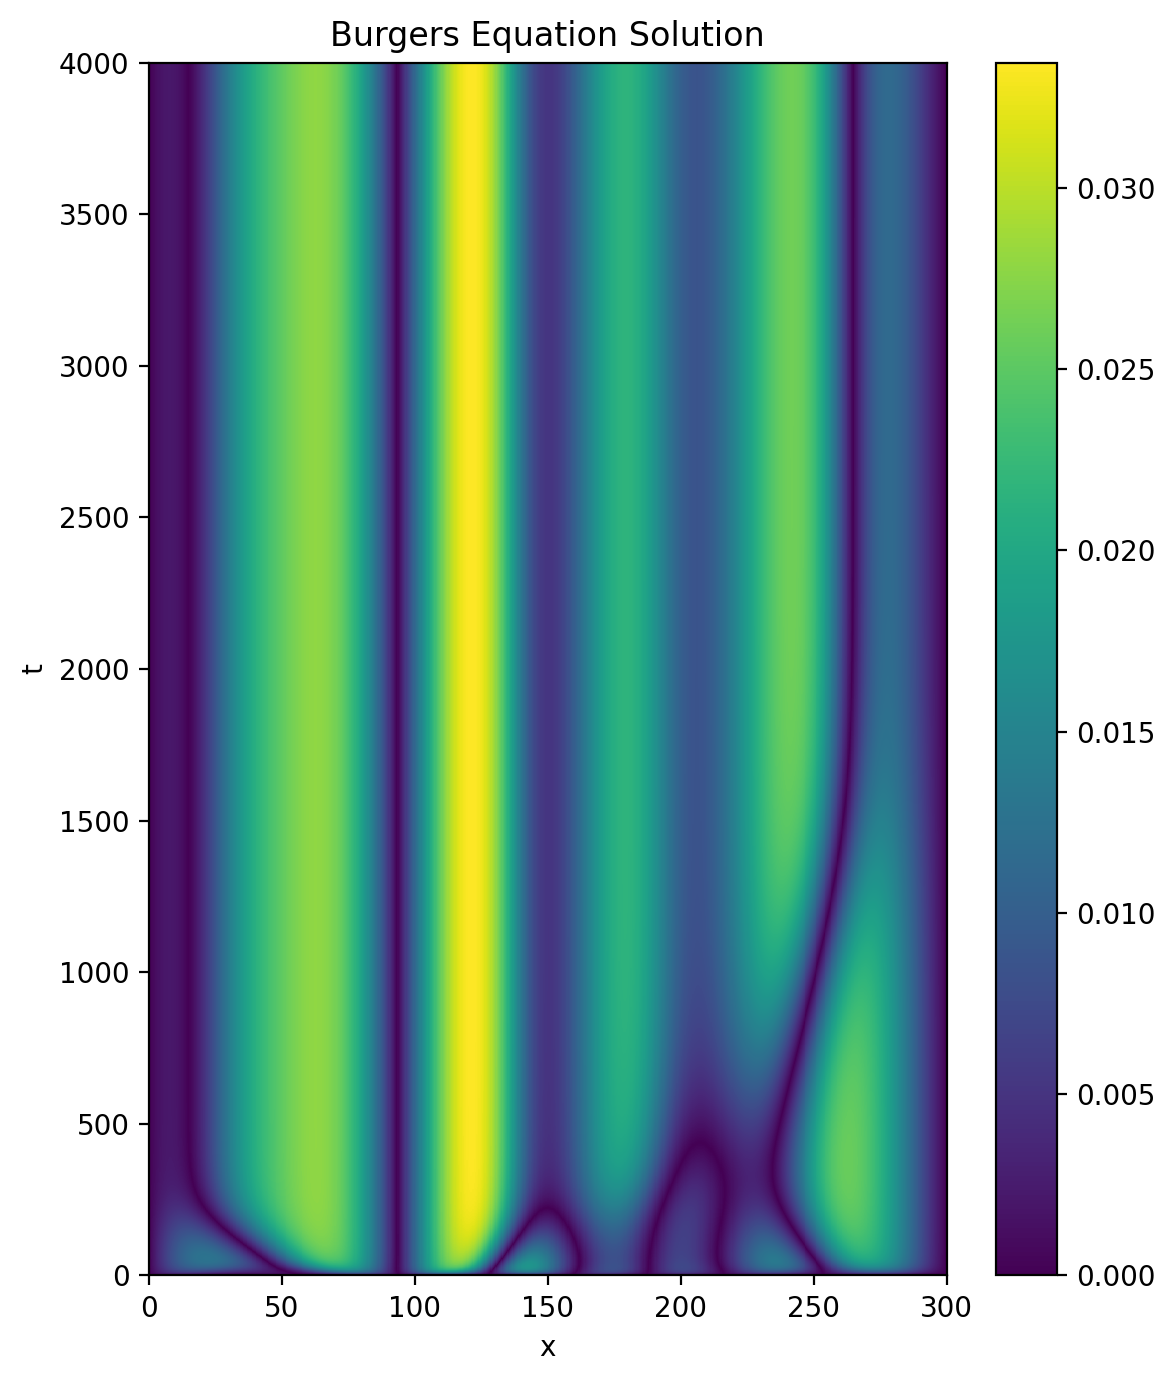

In [276]:
# Plot solution
plt.figure(figsize=(6, 7), dpi=100)
plt.pcolormesh(x, t_array, np.abs(u_array), shading='nearest')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Burgers Equation Solution')
plt.tight_layout()

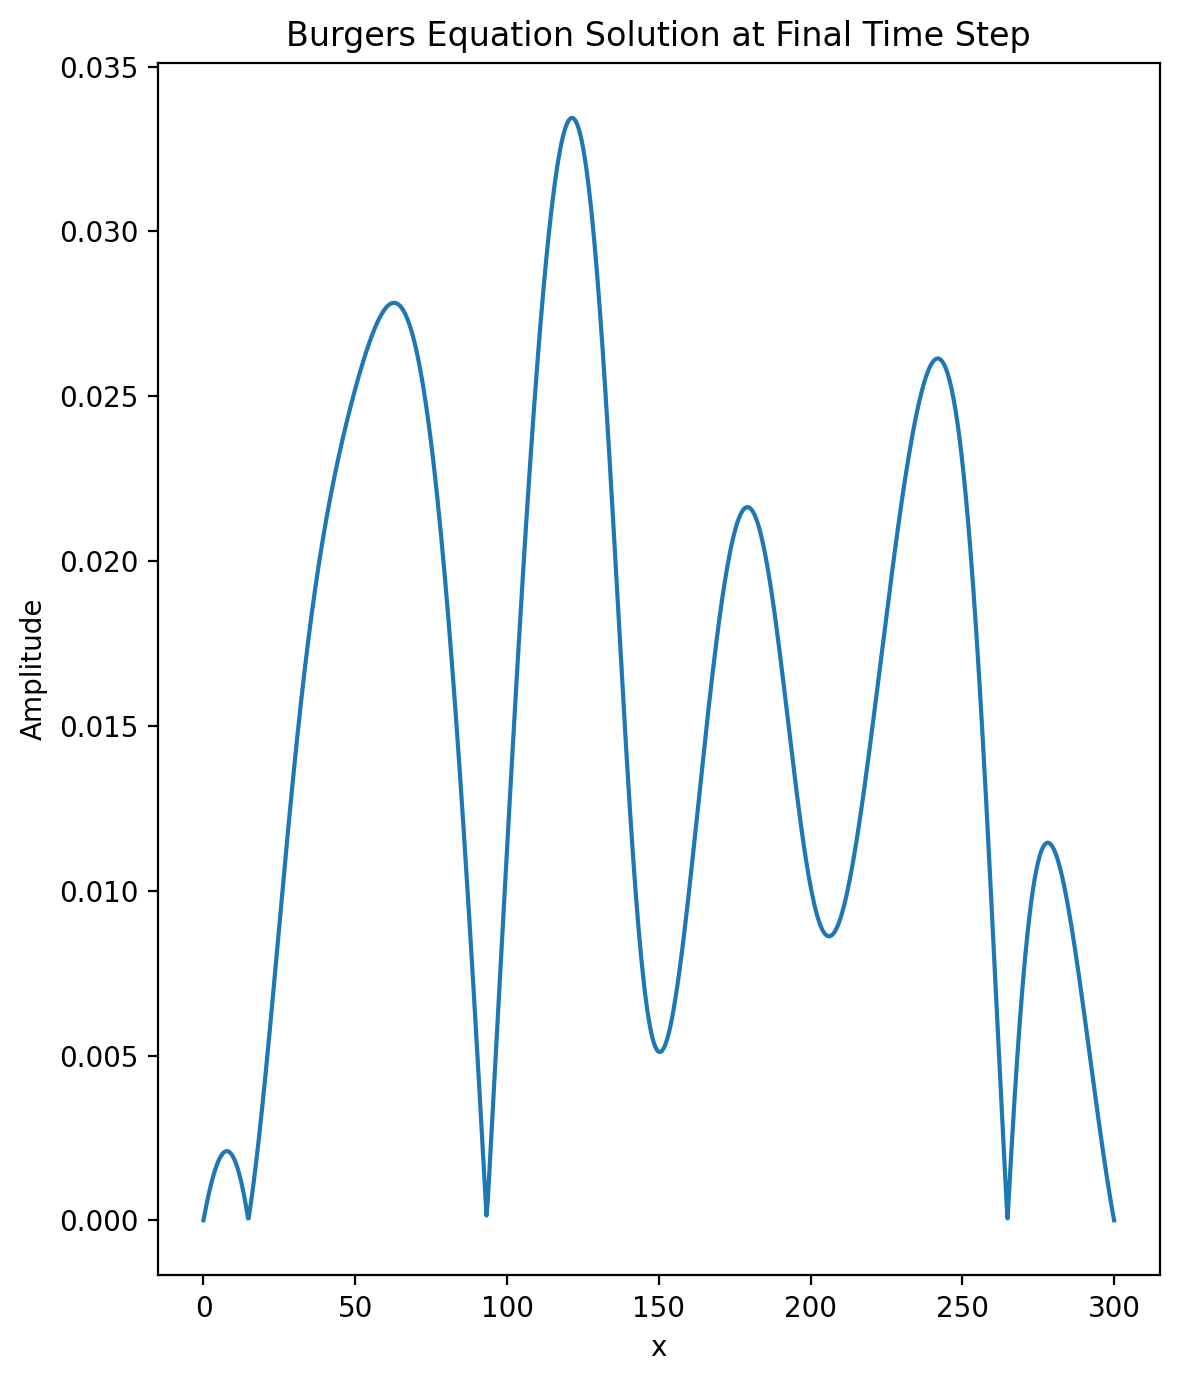

In [277]:
# Plot solution at the final time step
plt.figure(figsize=(6, 7), dpi=100)
plt.plot(x, np.abs(u_array[-1, :]))  # Select the last time step
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Burgers Equation Solution at Final Time Step')
plt.tight_layout()

In [8]:
import numpy as np
import dedalus.public as de

# Define the original Chebyshev basis using the correct parameter name
xbasis = de.Chebyshev('x', 32, bounds=(0, 1), dealias=3/2)
domain = de.Domain([xbasis], grid_dtype=np.float64)
f = domain.new_field()

# Initialize the field
f['g'] = np.sin(np.pi * xbasis.grid(scale=1))  # Example function

# Define a new uniform grid and interpolate
uniform_grid = np.linspace(0, 1, 100)
f.set_scales(1)  # Set scales for interpolation
interpolated_values = f.interpolate(x=uniform_grid)['g'].evaluate()


ValueError: Jacobi coord must be Coordinate object.